# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/kassyedwards/Desktop/API_HW//cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['bengkulu', 'new norfolk', 'punta arenas', 'tazovskiy', 'ostersund', 'pevek', 'cape town', 'hobart', 'butaritari', 'palpa', 'albany', 'mataura', 'taolanaro', 'krasnovishersk', 'bargal', 'kosh-agach', 'busselton', 'tailai', 'empalme', 'carballo', 'kaniama', 'bluff', 'prado', 'georgetown', 'preston', 'sibolga', 'constitucion', 'tias', 'bastia', 'thompson', 'ishigaki', 'erenhot', 'huarmey', 'havoysund', 'kapaa', 'lagos', 'honningsvag', 'beloyarsk', 'san policarpo', 'mocambique', 'sudbury', 'rikitea', 'shimoda', 'garchitorena', 'sentyabrskiy', 'matara', 'samusu', 'hami', 'grand river south east', 'tucuman', 'nemuro', 'carnarvon', 'ushuaia', 'grindavik', 'vila velha', 'mar del plata', 'castro', 'bolu', 'port alfred', 'yellowknife', 'tirat karmel', 'cabo san lucas', 'westport', 'vaini', 'chokurdakh', 'paucartambo', 'mirabela', 'faya', 'puerto ayora', 'palmer', 'maua', 'chuy', 'samtredia', 'dromolaxia', 'port elizabeth', 'dutlwe', 'tsihombe', 'haines junction', 'oksfjord', 'lavrentiya', 'bar

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
print(len(cities))

624


In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q=" + city
response = requests.get(query_url).json()

response

{'coord': {'lon': 27.91, 'lat': -33.02},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 291.15,
  'pressure': 1022,
  'humidity': 68,
  'temp_min': 291.15,
  'temp_max': 291.15},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 220},
 'clouds': {'all': 0},
 'dt': 1556978400,
 'sys': {'type': 1,
  'id': 1912,
  'message': 0.0055,
  'country': 'ZA',
  'sunrise': 1556945010,
  'sunset': 1556983604},
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [6]:
# Query function
def querygen(api_key='', city=cities):
    url ='https://api.openweathermap.org/data/2.5/weather'

    return f'{url}?q={city}&appid={api_key}&units=imperial'

In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?"
#create counter for cities
crec = 0
cmax = len(cities)

query_url = url + "appid=" + api_key + "&q=" + city

#append paramenters
citylist = []
country = []
date = []
lat = []
lon = []
maxtemp = []
humidity = []
clouds = []
wind = []

#pull weather data
for city in cities:
    crec = crec + 1
    response = requests.get(querygen(api_key=api_key, city=city)).json()
    
    try:
        print(f'Processing city {crec} of {cmax}: {response["name"]}')
        citylist.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        pass
        print(f'Could not find weather for {city}')
    
print(f'-----------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------')


Could not find weather for bengkulu
Processing city 2 of 624: New Norfolk
Processing city 3 of 624: Punta Arenas
Processing city 4 of 624: Tazovskiy
Processing city 5 of 624: Ostersund
Processing city 6 of 624: Pevek
Processing city 7 of 624: Cape Town
Processing city 8 of 624: Hobart
Processing city 9 of 624: Butaritari
Processing city 10 of 624: Palpa
Processing city 11 of 624: Albany
Processing city 12 of 624: Mataura
Could not find weather for taolanaro
Processing city 14 of 624: Krasnovishersk
Could not find weather for bargal
Processing city 16 of 624: Kosh-Agach
Processing city 17 of 624: Busselton
Processing city 18 of 624: Tailai
Processing city 19 of 624: Empalme
Processing city 20 of 624: Carballo
Processing city 21 of 624: Kaniama
Processing city 22 of 624: Bluff
Processing city 23 of 624: Prado
Processing city 24 of 624: Georgetown
Processing city 25 of 624: Preston
Processing city 26 of 624: Sibolga
Processing city 27 of 624: Constitucion
Processing city 28 of 624: Tias
P

Processing city 225 of 624: Esna
Processing city 226 of 624: Ribeira Grande
Processing city 227 of 624: Shache
Processing city 228 of 624: Vanavara
Could not find weather for bur gabo
Processing city 230 of 624: Russell
Processing city 231 of 624: Tautira
Processing city 232 of 624: Limenaria
Processing city 233 of 624: Palimbang
Processing city 234 of 624: Komsomolskiy
Processing city 235 of 624: Nhulunbuy
Could not find weather for richard toll
Processing city 237 of 624: Alugan
Processing city 238 of 624: Avera
Processing city 239 of 624: Avallon
Processing city 240 of 624: Korostyshiv
Processing city 241 of 624: Asyut
Processing city 242 of 624: Chirongui
Processing city 243 of 624: Labuhan
Could not find weather for amderma
Processing city 245 of 624: Qaanaaq
Processing city 246 of 624: Vaitape
Processing city 247 of 624: Alofi
Processing city 248 of 624: Ilulissat
Processing city 249 of 624: Nyrob
Processing city 250 of 624: Japura
Processing city 251 of 624: Mount Gambier
Proces

Processing city 445 of 624: Akdagmadeni
Could not find weather for cockburn harbour
Processing city 447 of 624: Tuatapere
Processing city 448 of 624: Morgan City
Processing city 449 of 624: Grand-Lahou
Processing city 450 of 624: Mago
Processing city 451 of 624: Hsinchu
Processing city 452 of 624: Sokoni
Processing city 453 of 624: Vrangel
Processing city 454 of 624: Chapais
Processing city 455 of 624: Varna
Processing city 456 of 624: Curvelo
Could not find weather for umzimvubu
Processing city 458 of 624: Mantua
Processing city 459 of 624: Chaihe
Processing city 460 of 624: North Bend
Processing city 461 of 624: Isiro
Processing city 462 of 624: Hobyo
Processing city 463 of 624: Luanshya
Processing city 464 of 624: Hrinova
Processing city 465 of 624: Vostok
Processing city 466 of 624: Wewak
Processing city 467 of 624: Salalah
Processing city 468 of 624: Tongzi
Processing city 469 of 624: Orbetello
Processing city 470 of 624: Goa
Processing city 471 of 624: Burnie
Processing city 472 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from cities, & other data
weather_dict = {
    "city": citylist,
    "lat": lat,
    "lon": lon,
    "country": country, 
    "date": date,
    "maxtemp": maxtemp,
    "humidity": humidity,
    "clouds": clouds,
    "wind": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,country,date,maxtemp,humidity,clouds,wind
0,New Norfolk,-42.78,147.06,AU,1556980839,53.60,71,75,6.93
1,Punta Arenas,-53.16,-70.91,CL,1556978400,33.80,75,75,3.36
2,Tazovskiy,67.47,78.70,RU,1556980840,35.15,99,100,12.93
3,Ostersund,63.18,14.64,SE,1556977800,37.40,74,40,13.87
4,Pevek,69.70,170.27,RU,1556980841,20.57,97,6,6.29


In [9]:
weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
xlat= weather_data['lat']
ytemp = weather_data['maxtemp']
yhumidity = weather_data['humidity']
ycloud = weather_data['clouds']
ywind = weather_data['wind']

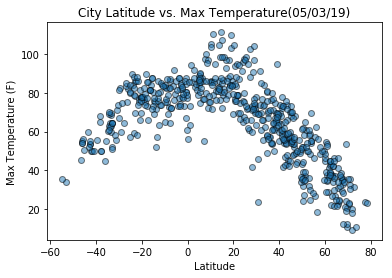

In [11]:
temp_scatter = plt.scatter(xlat, ytemp, marker="o", alpha=0.5, edgecolors="black")

plt.title("City Latitude vs. Max Temperature(05/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("temp_scatter.png")

#### Latitude vs. Humidity Plot

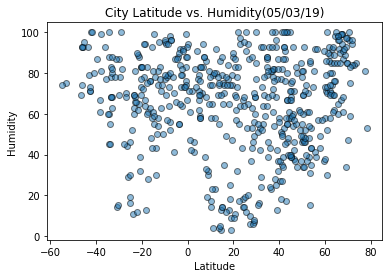

In [12]:
humidity_scatter = plt.scatter(xlat, yhumidity, marker="o", alpha=0.5, edgecolors="black")

plt.title("City Latitude vs. Humidity(05/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("humidity_scatter.png")

#### Latitude vs. Cloudiness Plot

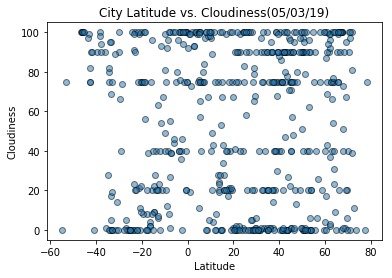

In [13]:
cloudiness_scatter = plt.scatter(xlat, ycloud, marker="o", alpha=0.5, edgecolors="black")

plt.title("City Latitude vs. Cloudiness(05/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("cloudiness_scatter.png")

#### Latitude vs. Wind Speed Plot

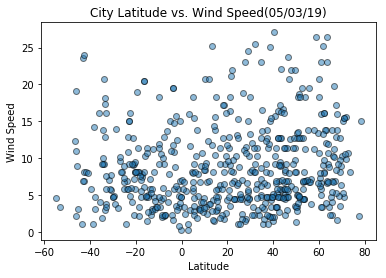

In [14]:
wind_scatter = plt.scatter(xlat, ywind, marker="o", alpha=0.5, edgecolors="black")

plt.title("City Latitude vs. Wind Speed(05/03/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("wind_scatter.png")